In [2]:
import numpy as np
import qforte as qf

import matplotlib.pyplot as plt
# from read_data import read_qite as read
from geometries.ene import get_geom as ene

In [3]:
print('\nBuild Psi4 Geometry')
print('-------------------------')

geom = [('H', (0., 0., 0.)), 
        ('H', (0., 0., 1.00)),
        ('H', (0., 0., 2.00)), 
        ('H', (0., 0., 3.00)),
        ('H', (0., 0., 4.00)),
        ('H', (0., 0., 5.00)),
        ('H', (0., 0., 6.00)), 
        ('H', (0., 0., 7.00)), 
        ]


# Get the molecule object that now contains both the fermionic and qubit Hamiltonians.
mol = qf.system_factory(build_type='psi4', 
                     mol_geometry=geom, 
                     basis='sto-6g', 
                     run_fci=True, 
                     run_ccsd=False,
                     store_mo_ints=1,
                     build_df_ham=1,
                     df_icut=1.0e-1)

# mol.ccsd_energy = 0.0

print(f'The FCI energy from Psi4:                                    {mol.fci_energy:12.10f}')
print(f'The HF energy from Psi4:                                     {mol.hf_energy:12.10f}')




Build Psi4 Geometry
-------------------------
 ==> Psi4 geometry <==
-------------------------
0  1
H  0.0  0.0  0.0
H  0.0  0.0  1.0
H  0.0  0.0  2.0
H  0.0  0.0  3.0
H  0.0  0.0  4.0
H  0.0  0.0  5.0
H  0.0  0.0  6.0
H  0.0  0.0  7.0
symmetry c1
units angstrom

  Memory set to   1.863 GiB by Python driver.
The FCI energy from Psi4:                                    -4.3360656520
The HF energy from Psi4:                                     -4.2013834341


In [7]:
print('\nBegin QITE test for H8 2nd order')
print('-------------------------')

alg = qf.QITE(mol, 
        reference=mol.hf_reference, 
        computer_type='fci', 
        verbose=0, 
        print_summary_file=0,
        apply_ham_as_tensor=True)

alg.run(beta=10.0, 
        db=0.05,
        dt=0.001,
        use_exact_evolution=False,   # <==== Nothing else matters if using exact evo
        use_diis=False,               # <==== Manin new option here
        max_diis_size=6,             # <==== Max number of previous iterations to use in DIIS
        sparseSb=0,
        expansion_type='SD', #All 
        low_memorySb=False,
        second_order=True, 
        print_pool=1, 
        evolve_dfham=False, 
        random_state=False, 
        selected_pool=False,
        physical_r=True,
        cumulative_t=True,
        t_thresh=1e-4)

Egs_FCI = alg.get_gs_energy()


print(f'The HF energy from Psi4:                                     {mol.hf_energy:12.10f}')
print(f'The FCI energy from Psi4:                                    {mol.fci_energy:12.10f}')

print(f'The FCI energy from FCI QITE:                                {Egs_FCI:12.10f}')
print(f'The FCI energy error:                                        {Egs_FCI - mol.fci_energy:12.10f}')



Begin QITE test for H8 2nd order
-------------------------

-----------------------------------------------------
     Quantum Imaginary Time Evolution Algorithm   
-----------------------------------------------------


                 ==> QITE options <==
-----------------------------------------------------------
Computer Type:                            fci
Trial reference state:                    |1111111100000000>
Number of Hamiltonian Pauli terms:        2913
Trial state preparation method:           occupation_list
Trotter order (rho):                      1
Trotter number (m):                       1
Use fast version of algorithm:            True


Total imaginary evolution time (beta):    10.0
Imaginary time step (db):                 0.05


Use Folded Spectrum:                      False


Use CIS Reference:                        False


Use exact evolutoin:                      False


Expansion type:                           SD
Use DIIS:                               

In [4]:
db_05_b = [
   0.000,       
   0.500,       
   1.000,       
   1.500,       
   2.000,       
   2.500,       
   3.000,       
   3.500,       
   4.000,       
   4.500,       
   5.000,       
   5.500,       
   6.000,       
   6.500,       
   7.000,       
   7.500,       
   8.000,       
   8.500,       
   9.000,       
   9.500,       
  10.000,
  ]


db_05_e = [
   -4.201383434,
   -4.304586120,
   -4.322045105,
   -4.328055789,
   -4.330808748,
   -4.332254161,
   -4.333073351,
   -4.333562165,
   -4.333865724,
   -4.334060516,
   -4.334188953,
   -4.334275536,
   -4.334334944,
   -4.334376274,
   -4.334405334,
   -4.334425932,
   -4.334440619,
   -4.334451139,
   -4.334458699,
   -4.334464146,
   -4.334468077,
]

db_01_b = [
   0.000,
   0.100,
   0.200,
   0.300,
   0.400,
   0.500,
   0.600,
   0.700,
   0.800,
   0.900,
   1.000,
   1.100,
   1.200,
   1.300,
   1.400,
   1.500,
   1.600,
   1.700,
   1.800,
   1.900,
   2.000,
   2.100,
   2.200,
   2.300,
   2.400,
   2.500,
   2.600,
   2.700,
   2.800,
   2.900,
   3.000,
   3.100,
   3.200,
   3.300,
   3.400,
   3.500,
   3.600,
   3.700,
   3.800,
   3.900,
   4.000,
   4.100,
   4.200,
   4.300,
   4.400,
   4.500,
   4.600,
   4.700,
   4.800,
   4.900,
   5.000,
   5.100,
   5.200,
   5.300,
   5.400,
   5.500,
   5.600,
   5.700,
   5.800,
   5.900,
   6.000,
   6.100,
   6.200,
   6.300,
   6.400,
   6.500,
   6.600,
   6.700,
   6.800,
   6.900,
   7.000,
   7.100,
   7.200,
   7.300,
   7.400,
   7.500,
   7.600,
   7.700,
   7.800,
   7.900,
   8.000,
   8.100,
   8.200,
   8.300,
   8.400,
   8.500,
   8.600,
   8.700,
   8.800,
   8.900,
   9.000,
   9.100,
   9.200,
   9.300,
   9.400,
   9.500,
   9.600,
   9.700,
   9.800,
   9.900,
  10.000,
]

db_01_e = [
   -4.201383434,
   -4.231932284,
   -4.254283136,
   -4.270856998,
   -4.283320185,
   -4.292823626,
   -4.300168695,
   -4.305919257,
   -4.310476704,
   -4.314130236,
   -4.317090738,
   -4.319513808,
   -4.321515560,
   -4.323183602,
   -4.324584725,
   -4.325770366,
   -4.326780522,
   -4.327646580,
   -4.328393390,
   -4.329040792,
   -4.329604757,
   -4.330098240,
   -4.330531825,
   -4.330914224,
   -4.331252655,
   -4.331553134,
   -4.331820708,
   -4.332059633,
   -4.332273520,
   -4.332465444,
   -4.332638041,
   -4.332793576,
   -4.332934007,
   -4.333061030,
   -4.333176122,
   -4.333280571,
   -4.333375508,
   -4.333461923,
   -4.333540691,
   -4.333612582,
   -4.333678281,
   -4.333738391,
   -4.333793453,
   -4.333843946,
   -4.333890299,
   -4.333932895,
   -4.333972077,
   -4.334008152,
   -4.334041399,
   -4.334072064,
   -4.334100374,
   -4.334126530,
   -4.334150715,
   -4.334173095,
   -4.334193820,
   -4.334213026,
   -4.334230836,
   -4.334247363,
   -4.334262709,
   -4.334276967,
   -4.334290222,
   -4.334302552,
   -4.334314027,
   -4.334324712,
   -4.334334666,
   -4.334343945,
   -4.334352598,
   -4.334360670,
   -4.334368204,
   -4.334375239,
   -4.334381810,
   -4.334387950,
   -4.334393690,
   -4.334399057,
   -4.334404078,
   -4.334408775,
   -4.334413172,
   -4.334417288,
   -4.334421144,
   -4.334424755,
   -4.334428138,
   -4.334431310,
   -4.334434282,
   -4.334437069,
   -4.334439683,
   -4.334442135,
   -4.334444435,
   -4.334446594,
   -4.334448620,
   -4.334450521,
   -4.334452306,
   -4.334453982,
   -4.334455556,
   -4.334457034,
   -4.334458423,
   -4.334459727,
   -4.334460953,
   -4.334462104,
   -4.334463186,
   -4.334464203,
   -4.334465159,
]

db_005_b = [
   0.000,
   0.050,
   0.100,
   0.150,
   0.200,
   0.250,
   0.300,
   0.350,
   0.400,
   0.450,
   0.500,
   0.550,
   0.600,
   0.650,
   0.700,
   0.750,
   0.800,
   0.850,
   0.900,
   0.950,
   1.000,
   1.050,
   1.100,
   1.150,
   1.200,
   1.250,
   1.300,
   1.350,
   1.400,
   1.450,
   1.500,
   1.550,
   1.600,
   1.650,
   1.700,
   1.750,
   1.800,
   1.850,
   1.900,
   1.950,
   2.000,
   2.050,
   2.100,
   2.150,
   2.200,
   2.250,
   2.300,
   2.350,
   2.400,
   2.450,
   2.500,
   2.550,
   2.600,
   2.650,
   2.700,
   2.750,
   2.800,
   2.850,
   2.900,
   2.950,
   3.000,
   3.050,
   3.100,
   3.150,
   3.200,
   3.250,
   3.300,
   3.350,
   3.400,
   3.450,
   3.500,
   3.550,
   3.600,
   3.650,
   3.700,
   3.750,
   3.800,
   3.850,
   3.900,
   3.950,
   4.000,
   4.050,
   4.100,
   4.150,
   4.200,
   4.250,
   4.300,
   4.350,
   4.400,
   4.450,
   4.500,
   4.550,
   4.600,
   4.650,
   4.700,
   4.750,
   4.800,
   4.850,
   4.900,
   4.950,
   5.000,
   5.050,
   5.100,
   5.150,
   5.200,
   5.250,
   5.300,
   5.350,
   5.400,
   5.450,
   5.500,
   5.550,
   5.600,
   5.650,
   5.700,
   5.750,
   5.800,
   5.850,
   5.900,
   5.950,
   6.000,
   6.050,
   6.100,
   6.150,
   6.200,
   6.250,
   6.300,
   6.350,
   6.400,
   6.450,
   6.500,
   6.550,
   6.600,
   6.650,
   6.700,
   6.750,
   6.800,
   6.850,
   6.900,
   6.950,
   7.000,
   7.050,
   7.100,
   7.150,
   7.200,
   7.250,
   7.300,
   7.350,
   7.400,
   7.450,
   7.500,
   7.550,
   7.600,
   7.650,
   7.700,
   7.750,
   7.800,
   7.850,
   7.900,
   7.950,
   8.000,
   8.050,
   8.100,
   8.150,
   8.200,
   8.250,
   8.300,
   8.350,
   8.400,
   8.450,
   8.500,
   8.550,
   8.600,
   8.650,
   8.700,
   8.750,
   8.800,
   8.850,
   8.900,
   8.950,
   9.000,
   9.050,
   9.100,
   9.150,
   9.200,
   9.250,
   9.300,
   9.350,
   9.400,
   9.450,
   9.500,
   9.550,
   9.600,
   9.650,
   9.700,
   9.750,
   9.800,
   9.850,
   9.900,
   9.950,
  10.000,
]

db_005_e = [
   -4.201383434,
   -4.217267374,
   -4.230918882,
   -4.242682528,
   -4.252847736,
   -4.261657293,
   -4.269314784,
   -4.275990994,
   -4.281829326,
   -4.286950365,
   -4.291455688,
   -4.295431034,
   -4.298948934,
   -4.302070892,
   -4.304849187,
   -4.307328372,
   -4.309546513,
   -4.311536214,
   -4.313325478,
   -4.314938413,
   -4.316395832,
   -4.317715742,
   -4.318913769,
   -4.320003500,
   -4.320996781,
   -4.321903962,
   -4.322734112,
   -4.323495189,
   -4.324194198,
   -4.324837316,
   -4.325430002,
   -4.325977089,
   -4.326482870,
   -4.326951162,
   -4.327385364,
   -4.327788515,
   -4.328163331,
   -4.328512248,
   -4.328837453,
   -4.329140916,
   -4.329424409,
   -4.329689535,
   -4.329937742,
   -4.330170343,
   -4.330388529,
   -4.330593382,
   -4.330785890,
   -4.330966949,
   -4.331137382,
   -4.331297939,
   -4.331449306,
   -4.331592116,
   -4.331726946,
   -4.331854329,
   -4.331974755,
   -4.332088676,
   -4.332196509,
   -4.332298639,
   -4.332395423,
   -4.332487192,
   -4.332574251,
   -4.332656884,
   -4.332735355,
   -4.332809911,
   -4.332880779,
   -4.332948172,
   -4.333012289,
   -4.333073316,
   -4.333131424,
   -4.333186777,
   -4.333239525,
   -4.333289811,
   -4.333337766,
   -4.333383516,
   -4.333427178,
   -4.333468861,
   -4.333508668,
   -4.333546696,
   -4.333583037,
   -4.333617775,
   -4.333650993,
   -4.333682765,
   -4.333713165,
   -4.333742259,
   -4.333770111,
   -4.333796783,
   -4.333822330,
   -4.333846806,
   -4.333870264,
   -4.333892750,
   -4.333914310,
   -4.333934988,
   -4.333954824,
   -4.333973858,
   -4.333992125,
   -4.334009662,
   -4.334026500,
   -4.334042671,
   -4.334058204,
   -4.334073129,
   -4.334087472,
   -4.334101259,
   -4.334114513,
   -4.334127258,
   -4.334139515,
   -4.334151307,
   -4.334162651,
   -4.334173568,
   -4.334184075,
   -4.334194190,
   -4.334203929,
   -4.334213307,
   -4.334222339,
   -4.334231040,
   -4.334239423,
   -4.334247501,
   -4.334255286,
   -4.334262790,
   -4.334270024,
   -4.334276999,
   -4.334283725,
   -4.334290212,
   -4.334296470,
   -4.334302506,
   -4.334308331,
   -4.334313952,
   -4.334319376,
   -4.334324612,
   -4.334329667,
   -4.334334546,
   -4.334339258,
   -4.334343809,
   -4.334348203,
   -4.334352448,
   -4.334356549,
   -4.334360510,
   -4.334364338,
   -4.334368037,
   -4.334371612,
   -4.334375067,
   -4.334378406,
   -4.334381634,
   -4.334384756,
   -4.334387773,
   -4.334390691,
   -4.334393513,
   -4.334396242,
   -4.334398882,
   -4.334401435,
   -4.334403905,
   -4.334406295,
   -4.334408607,
   -4.334410844,
   -4.334413009,
   -4.334415103,
   -4.334417131,
   -4.334419093,
   -4.334420992,
   -4.334422830,
   -4.334424610,
   -4.334426333,
   -4.334428001,
   -4.334429616,
   -4.334431180,
   -4.334432695,
   -4.334434161,
   -4.334435581,
   -4.334436957,
   -4.334438289,
   -4.334439579,
   -4.334440829,
   -4.334442040,
   -4.334443213,
   -4.334444349,
   -4.334445450,
   -4.334446517,
   -4.334447550,
   -4.334448552,
   -4.334449522,
   -4.334450462,
   -4.334451374,
   -4.334452257,
   -4.334453112,
   -4.334453942,
   -4.334454746,
   -4.334455525,
   -4.334456280,
   -4.334457012,
   -4.334457722,
   -4.334458410,
   -4.334459076,
   -4.334459723,
   -4.334460349,
   -4.334460957,
   -4.334461546,
   -4.334462117,
   -4.334462671,
   -4.334463208,
   -4.334463728,
   -4.334464233,
   -4.334464723,
]

print(db_05_b)
print(db_05_e)

print(db_01_b)
print(db_01_e)

print(db_005_b)
print(db_005_e)

log_db_05_e = [abs(float(item) - mol.fci_energy) for item in db_05_e]
log_db_01_e = [abs(float(item) - mol.fci_energy) for item in db_01_e]
log_db_005_e = [abs(float(item) - mol.fci_energy) for item in db_005_e]


[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0]
[-4.201383434, -4.30458612, -4.322045105, -4.328055789, -4.330808748, -4.332254161, -4.333073351, -4.333562165, -4.333865724, -4.334060516, -4.334188953, -4.334275536, -4.334334944, -4.334376274, -4.334405334, -4.334425932, -4.334440619, -4.334451139, -4.334458699, -4.334464146, -4.334468077]
[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0]
[-4.201383434, -4.231932284, -4.254283136, -4.270856998, -4.283320185, -4.292823626, -4.3001

[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0]
[-4.201383434, -4.30458612, -4.322045105, -4.328055789, -4.330808748, -4.332254161, -4.333073351, -4.333562165, -4.333865724, -4.334060516, -4.334188953, -4.334275536, -4.334334944, -4.334376274, -4.334405334, -4.334425932, -4.334440619, -4.334451139, -4.334458699, -4.334464146, -4.334468077]
[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0]
[-4.201383434, -4.231932284, -4.254283136, -4.270856998, -4.283320185, -4.292823626, -4.3001

Text(0, 0.5, 'Energy $E_h$')

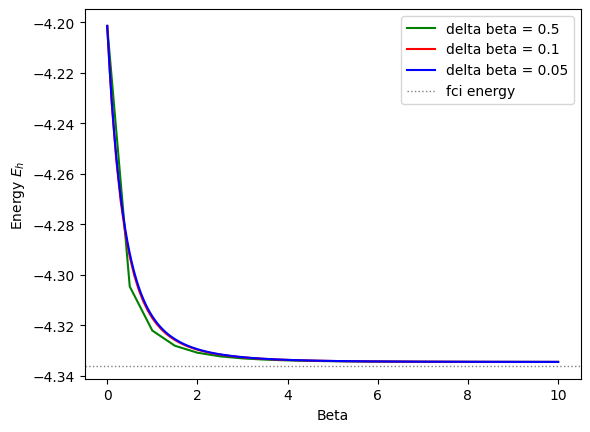

In [5]:
# Plot 1: Energy Error vs m
plt.figure()
# plt.xscale('log')
# plt.yscale('log')

# plt.plot(SD_m, SD_e, linestyle='-', color='black', label='SD')
print(db_05_b)
print(db_05_e)

print(db_01_b)
print(db_01_e)

print(db_005_b)
print(db_005_e)
plt.plot(db_05_b, db_05_e, linestyle='-', color='green', label='delta beta = 0.5')
plt.plot(db_01_b, db_01_e, linestyle='-', color='red', label='delta beta = 0.1')
plt.plot(db_005_b, db_005_e, linestyle='-', color='blue', label='delta beta = 0.05')

plt.axhline(y=mol.fci_energy, color='gray', linestyle=':', linewidth=1, label='fci energy')
plt.legend()

plt.xlabel('Beta')
plt.ylabel('Energy $E_h$')

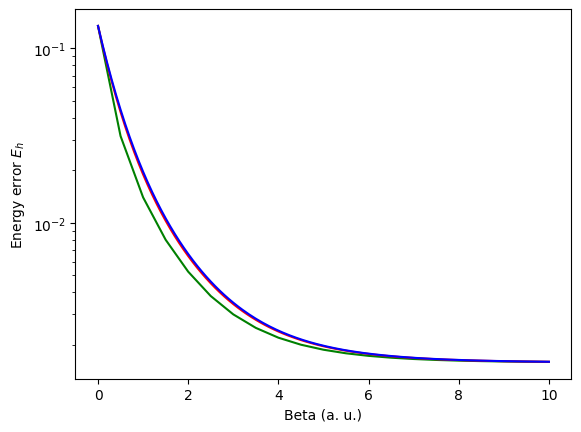

In [7]:
# Plot 1: Energy Error vs m
plt.figure()
# plt.xscale('log')
plt.yscale('log')

# plt.plot(SD_m, SD_e, linestyle='-', color='black', label='SD')
plt.plot(db_05_b, log_db_05_e, linestyle='-', color='green', label='delta beta = 0.5')
plt.plot(db_01_b, log_db_01_e, linestyle='-', color='red', label='delta beta = 0.1')
plt.plot(db_005_b, log_db_005_e, linestyle='-', color='blue', label='delta beta = 0.05')

# plt.axhline(y=mol.fci_energy, color='gray', linestyle=':', linewidth=1, label='fci energy')
# plt.legend()

plt.xlabel('Beta (a. u.)')
plt.ylabel('Energy error $E_h$')
plt.savefig(fname='dbplot.png', dpi=300)